In [1]:
import sympy as sy
from sympy.vector import CoordSys3D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
N = CoordSys3D('N')
i=N.i
j=N.j
k=N.k

def norm(BC):
    return sy.sqrt(BC.dot(BC))
def unit(BC):
    return BC/norm(BC)
def projectNorm(v1,v2):
    #projeta v1 em v2
    return v1.dot(unit(v2))
def vector(a,b,c):
    return a*i+b*j+c*k
def subValues(exp,symbolVector,valuesVector):
    for i in range(len(symbolVector)):
        exp=exp.subs(symbolVector[i],valuesVector[i])
    return exp
def angle(v1,v2):
    cos=unit(v1).dot(unit(v2))
    ang=sy.acos(cos)
    return ang #RADIANS!
def solveForces(Forcas,aplicacao,icognitas,debugON=False):
    n=len(Forcas)
    vetorAplicacao=[]
    for f in range(n):
        vetorAplicacao.append(vector(*aplicacao[f]))

    #Somatorio das forcas
    dir=[i,j,k]
    somaF=[0,0,0]
    for f in range(n):
        for d in range(3):
            somaF[d]+=Forcas[f].dot(dir[d])
    #Somatorio dos momentos
    somaM=[0,0,0]
    for f in range(n):
        for d in range(3):
            somaM[d]+=(vetorAplicacao[f].cross(Forcas[f])).dot(dir[d])
    #Resolver equacoes
    equacoes=somaF+somaM
    equacoes = [i for i in equacoes if i != 0] #eliminar zeros
    result=sy.solve(equacoes,*icognitas)
    print(result)
    res=[]

    if(debugON):
        print('Forcas')
        print(Forcas)
        print('Equacoes')
        print(equacoes)
    for icog in range(len(icognitas)):
        res.append(result[icognitas[icog]])

        
    return res
    
def resposta(r,unidade):
    if(unidade==r'^{\circ}'):
        r=np.rad2deg(float(r))
    try:
        value=sy.symbols('{0:.3f}'.format(r)+unidade)
    except:
        #print("symbolic")
        value=r
    display(pd.DataFrame([cell_vars()]).round(2).transpose())
    print('A resposta final é:')
    display(value)

def cell_vars(offset=0):
    import io
    from contextlib import redirect_stdout

    ipy = get_ipython()
    out = io.StringIO()

    with redirect_stdout(out):
        ipy.magic("history {0}".format(ipy.execution_count - offset))

    #process each line...
    x = out.getvalue().replace(" ", "").split("\n")
    x = [a.split("=")[0] for a in x if "=" in a] #all of the variables in the cell
    g = globals()
    result = {k:g[k] for k in x if k in g}
    return result


from IPython.display import Image
from IPython.display import display, Math, Latex
from IPython.core.magic import register_cell_magic


@register_cell_magic
def write_and_run(line, cell):
    argz = line.split()
    file = argz[-1]
    mode = 'w'
    if len(argz) == 2 and argz[0] == '-a':
        mode = 'a'
    with open(file, mode) as f:
        f.write(cell)
    get_ipython().run_cell(cell)

<IPython.core.display.Math object>

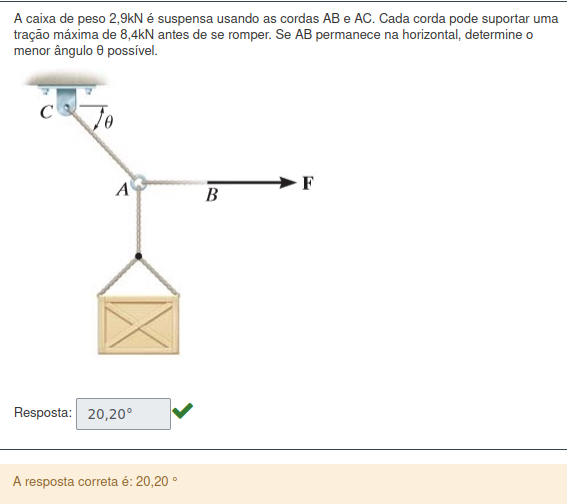

In [2]:
questao='1.1'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [3]:
%%write_and_run inputs/$questao
va=3.7
vb=1.6
vc=7.8
vd=3.7
ve=8.1

FileNotFoundError: [Errno 2] No such file or directory: 'inputs/1.1'

In [4]:
%%write_and_run resolutions/$questao
a,b,c,d,e, modF = sy.symbols(r"a b c d e |F|")
symbolVector = [a,b,c,d,e]
valuesVector = [va,vb,vc,vd,ve]
BC=-c*i-a*j+b*k
BCu=unit(BC)
CD=vector(-c,e,b)
CDu=unit(CD)
F=100*CDu
norm_F_BC=projectNorm(F,BC)
norm_F_BC_value=subValues(norm_F_BC,symbolVector,valuesVector)
resposta(norm_F_BC_value,'N')

FileNotFoundError: [Errno 2] No such file or directory: 'resolutions/1.1'

<IPython.core.display.Math object>

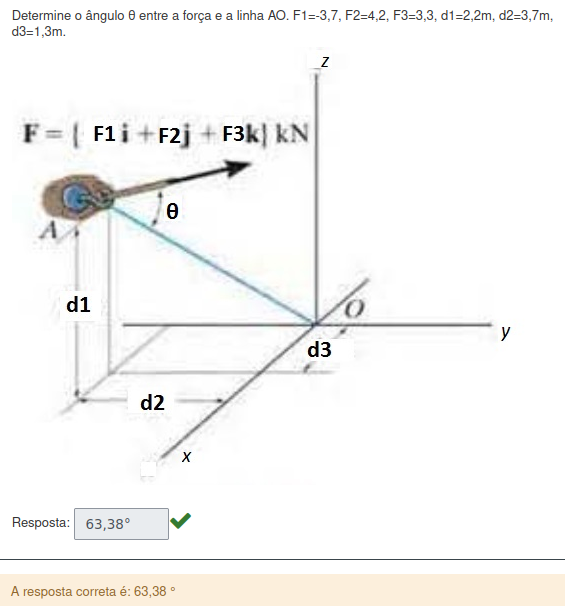

In [96]:
questao='1.2'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [97]:
%%write_and_run inputs/$questao
F1=-3.7
F2=4.2
F3=3.3
d1=2.2
d2=3.7
d3=1.3

In [98]:
F=vector(F1,F2,F3)
AO=vector(-d3,d2,-d1)
ang=angle(F,AO)
resposta(ang,r'^{\circ}')


/tmp/ipykernel_10372/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
F,(-3.7)*N.i + 4.2*N.j + 3.3*N.k
AO,(-1.3)*N.i + 3.7*N.j + (-2.2)*N.k
ang,1.10625551765562


A resposta final é:


63.384^{\circ}

<IPython.core.display.Math object>

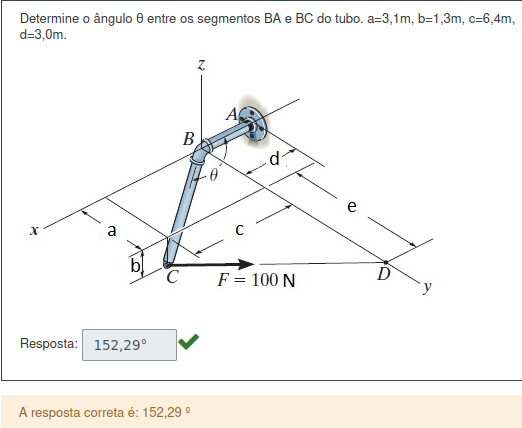

In [99]:
questao='1.3'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [100]:
%%write_and_run inputs/$questao
a=3.1
b=1.3
c=6.4
d=3.0

In [101]:
%%write_and_run resolutions/$questao
BC=c*i+a*j-b*k
BA=vector(-1,0,0)
ang=angle(BC,BA)
resposta(ang,r'^{\circ}')


/tmp/ipykernel_10372/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
BC,6.4*N.i + 3.1*N.j + (-1.3)*N.k
BA,(-1)*N.i
ang,2.65795614824511


A resposta final é:


152.290^{\circ}

<IPython.core.display.Math object>

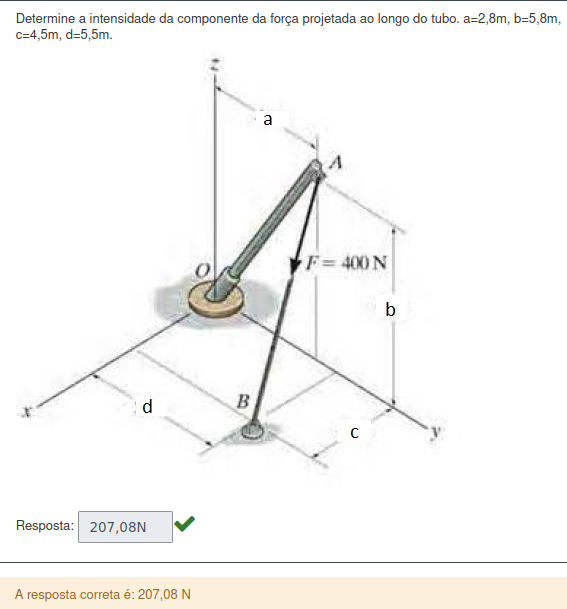

In [102]:
questao='1.4'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [103]:
%%write_and_run inputs/$questao
a=2.8
b=5.8
c=4.5
d=5.5
modF=400

In [104]:
%%write_and_run resolutions/$questao
AB=vector(c,d-a,-b)
ABu=unit(AB)
F=modF*ABu
AO=vector(0,-a,-b)
AOu=unit(AO)
modFAO=F.dot(AOu)
resposta(modFAO,'N')


/tmp/ipykernel_10372/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
AB,4.5*N.i + 2.7*N.j + (-5.8)*N.k
ABu,0.575317755486223*N.i + 0.345190653291734*N.j ...
F,230.127102194489*N.i + 138.076261316693*N.j + ...
AO,(-2.8)*N.j + (-5.8)*N.k
AOu,(-0.434749065831176)*N.j + (-0.900551636364578...
modFAO,207.082532829750


A resposta final é:


207.083N

<IPython.core.display.Math object>

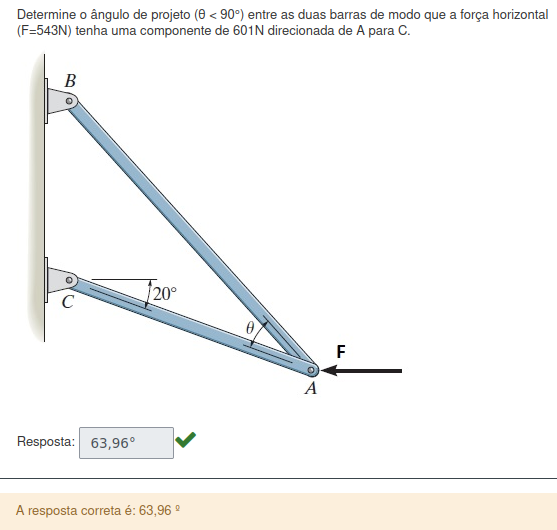

In [105]:
questao='1.5'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [106]:
%%write_and_run inputs/$questao
modF=543
modFAC=601

In [107]:
%%write_and_run resolutions/$questao
alpha=np.radians(20)
F=modF*vector(-1,0,0)
FAC=modFAC*vector(-sy.cos(alpha),sy.sin(alpha),0)
FBA=F-FAC
beta=sy.atan(-FBA.dot(j)/FBA.dot(i))
theta=beta-alpha
resposta(theta,r'^{\circ}')


/tmp/ipykernel_10372/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
alpha,0.35
F,(-543)*N.i
FAC,(-564.755265092331)*N.i + 205.554106138727*N.j
FBA,21.755265092331*N.i + (-205.554106138727)*N.j
beta,1.46535169944643
theta,1.11628584904756


A resposta final é:


63.958^{\circ}

<IPython.core.display.Math object>

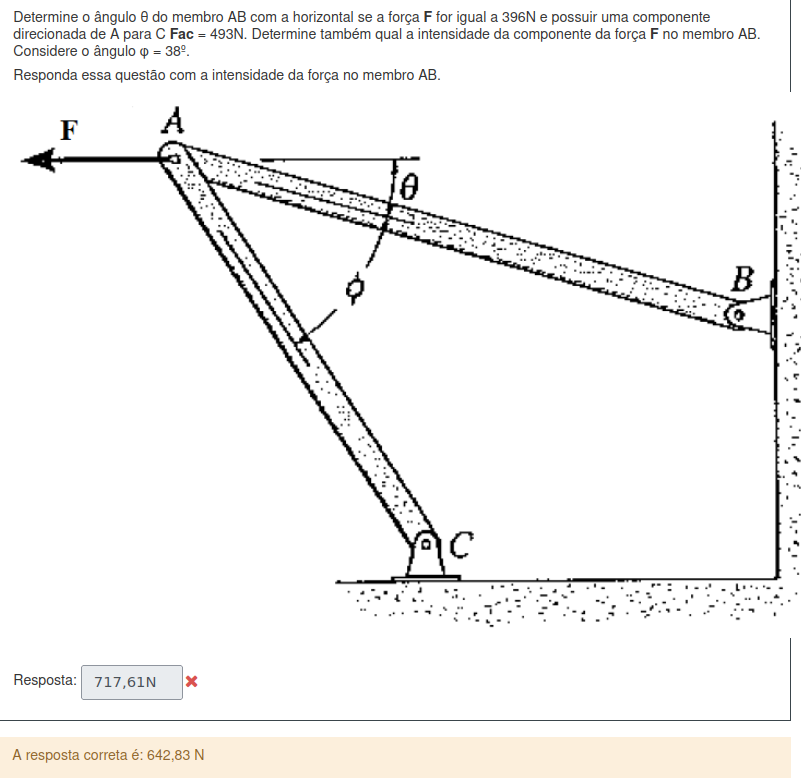

In [108]:
questao='1.6'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [109]:
%%write_and_run inputs/$questao
modF=396
modFAC=493
psi=38

In [110]:
%%write_and_run resolutions/$questao
psiRad=np.radians(psi)
FAC=modFAC*vector(sy.cos(psiRad),-sy.sin(psiRad),0)
theta=sy.asin(modFAC/modF*sy.sin(psiRad))
thetaDeg=np.rad2deg(float(theta))
#print(thetaDeg)
modFAB=(modF*(-sy.cos(theta))-modFAC*sy.cos(psiRad))/(-1)
resposta(modFAB,'N')

/tmp/ipykernel_10372/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
psiRad,0.66
FAC,388.489301528114*N.i + (-303.52110733555)*N.j
theta,0.873322954926376
thetaDeg,50.04
modFAB,642.833433368819


A resposta final é:


642.833N

<IPython.core.display.Math object>

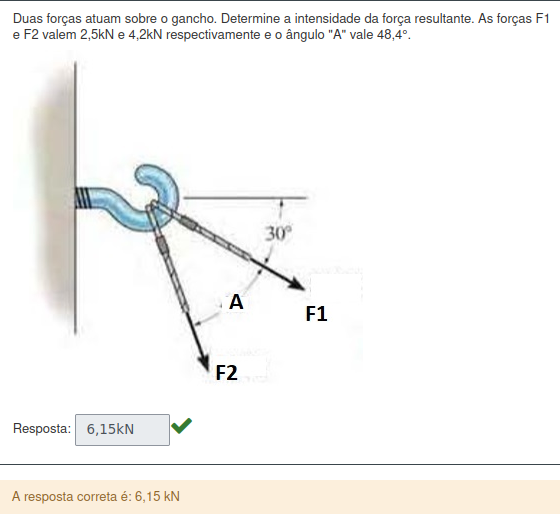

In [111]:
questao='1.7'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [112]:
%%write_and_run inputs/$questao
modF1=2.5
modF2=4.2
A=48.4

In [113]:
%%write_and_run resolutions/$questao
Arad=np.radians(A)
F2=vector(modF2,0,0)
F1=modF1*vector(sy.cos(Arad),sy.sin(Arad),0)
F=F1+F2
modF=norm(F)
resposta(modF,'kN')

/tmp/ipykernel_10372/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
Arad,0.84
F2,4.2*N.i
F1,1.6598155316306*N.i + 1.86949522624633*N.j
F,5.8598155316306*N.i + 1.86949522624633*N.j
modF,6.15080892775065


A resposta final é:


6.151kN

<IPython.core.display.Math object>

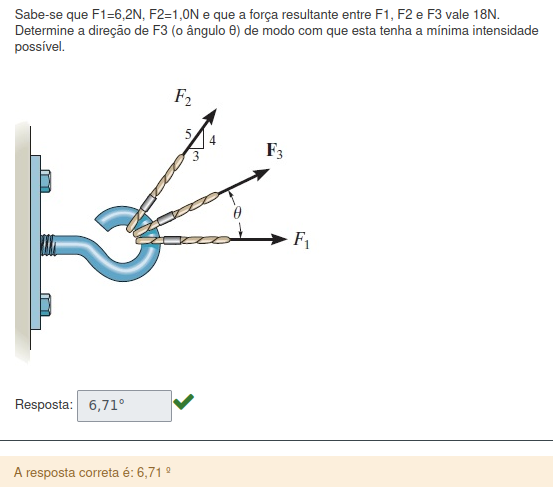

In [114]:
questao='1.8'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [115]:
%%write_and_run inputs/$questao
modF1=6.2
modF2=1.0
modF=18

In [116]:
%%write_and_run resolutions/$questao
F1=modF1*vector(1,0,0)
F2=modF2*vector(3/5,4/5,0)
F12=F1+F2
modF12=norm(F12)
theta=sy.atan(F12.dot(j)/F12.dot(i))
resposta(theta,r'^{\circ}')


/tmp/ipykernel_10372/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
F1,6.2*N.i
F2,0.6*N.i + 0.8*N.j
F12,6.8*N.i + 0.8*N.j
modF12,6.84689710744948
theta,0.117108744566864


A resposta final é:


6.710^{\circ}

<IPython.core.display.Math object>

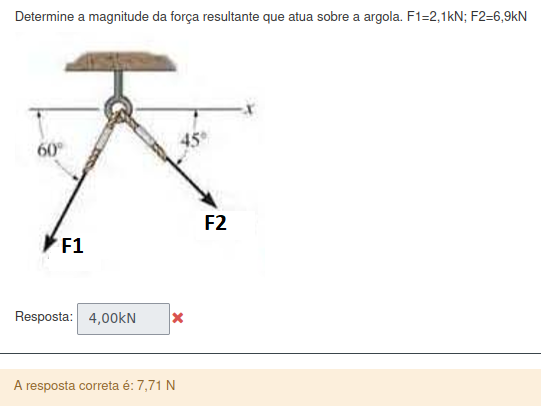

In [117]:
questao='1.9'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [118]:
%%write_and_run inputs/$questao
modF1=2.1
modF2=6.9

In [119]:
%%write_and_run resolutions/$questao
theta=np.radians(75)
F1=modF1*vector(1,0,0)
F2=modF2*vector(sy.cos(theta),sy.sin(theta),0)
F=F1+F2
modF=norm(F)
resposta(modF,'kN')


/tmp/ipykernel_10372/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
theta,1.31
F1,2.1*N.i
F2,1.78585141120739*N.i + 6.66488820139457*N.j
F,3.88585141120739*N.i + 6.66488820139457*N.j
modF,7.71495793423860


A resposta final é:


7.715kN

<IPython.core.display.Math object>

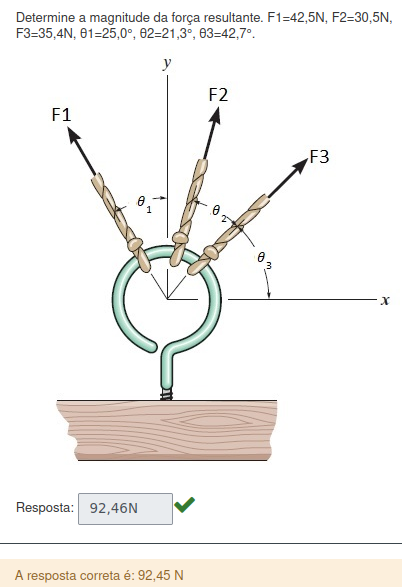

In [120]:
questao='1.10'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [121]:
%%write_and_run inputs/$questao
modF1=42.5
modF2=30.5
modF3=35.4
theta1=25
theta2=21.3
theta3=42.7

In [122]:
%%write_and_run resolutions/$questao
theta1rad=np.radians(theta1)
theta2rad=np.radians(theta2)
theta3rad=np.radians(theta3)
F1=modF1*vector(-sy.sin(theta1rad),sy.cos(theta1rad),0)
F2=modF2*vector(sy.cos(theta3rad+theta2rad),sy.sin(theta3rad+theta2rad),0)
F3=modF3*vector(sy.cos(theta3rad),sy.sin(theta3rad),0)
F=F1+F2+F3
modF=norm(F)
resposta(modF,'N')


/tmp/ipykernel_10372/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
theta1rad,0.44
theta2rad,0.37
theta3rad,0.75
F1,(-17.9612761239797)*N.i + 38.5180809490576*N.j
F2,13.3703199770669*N.i + 27.4132184121246*N.j
F3,26.0159766683086*N.i + 24.0068523133297*N.j
F,21.4250205213957*N.i + 89.9381516745119*N.j
modF,92.4548680761037


A resposta final é:


92.455N

<IPython.core.display.Math object>

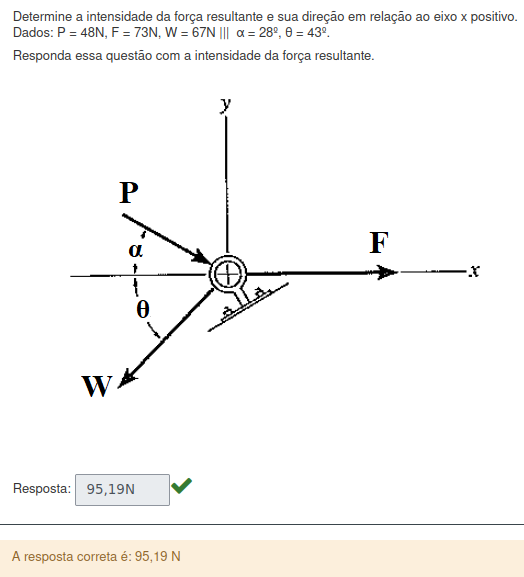

In [123]:
questao='2.1'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [124]:
%%write_and_run inputs/$questao
modP=48
modF=73
modW=67
alpha=28
theta=43

In [125]:
%%write_and_run resolutions/$questao
alphaRad=np.radians(alpha)
thetaRad=np.radians(theta)


P=modP*vector(sy.cos(alphaRad),-sy.sin(alphaRad),0)
W=modW*vector(-sy.cos(thetaRad),-sy.sin(thetaRad),0)
F=modF*vector(1,0,0)
R=P+W+F
modR=norm(R)
resposta(modR,'N')

/tmp/ipykernel_10372/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
alphaRad,0.49
thetaRad,0.75
P,42.3814844572285*N.i + (-22.5346350137228)*N.j
W,(-49.0006980084844)*N.i + (-45.6938901241874)*N.j
F,73*N.i
R,66.3807864487441*N.i + (-68.2285251379102)*N.j
modR,95.1921238971387


A resposta final é:


95.192N

<IPython.core.display.Math object>

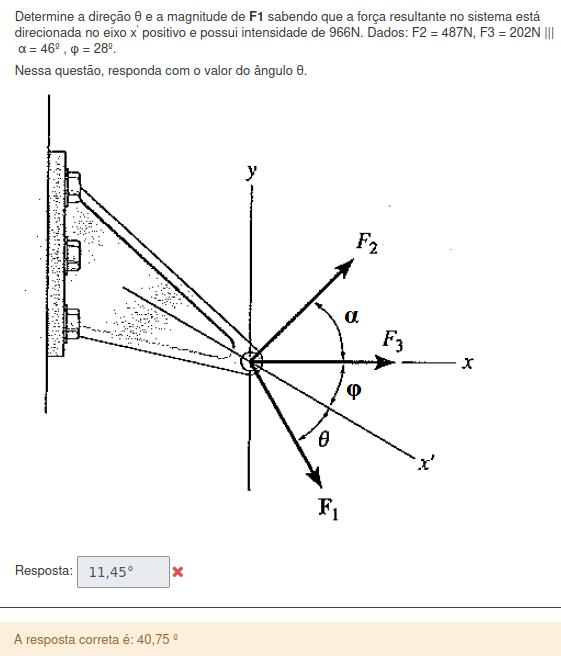

In [126]:
questao='2.2'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [127]:
%%write_and_run inputs/$questao
modF=966
modF2=487
modF3=202
alpha_deg=46
fi_deg=28

In [128]:
%%write_and_run resolutions/$questao
#usar eixo x' como referencia
alpha=np.radians(alpha_deg)
fi=np.radians(fi_deg)
beta=sy.atan((modF*sy.sin(fi)+modF2*sy.sin(alpha))/(modF*sy.cos(fi)-modF2*sy.cos(alpha)-modF3))
theta=beta-fi
resposta(theta,r'^{\circ}')

/tmp/ipykernel_10372/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
alpha,0.8
fi,0.49
beta,1.19987373746512
theta,0.711181546906711


A resposta final é:


40.748^{\circ}

<IPython.core.display.Math object>

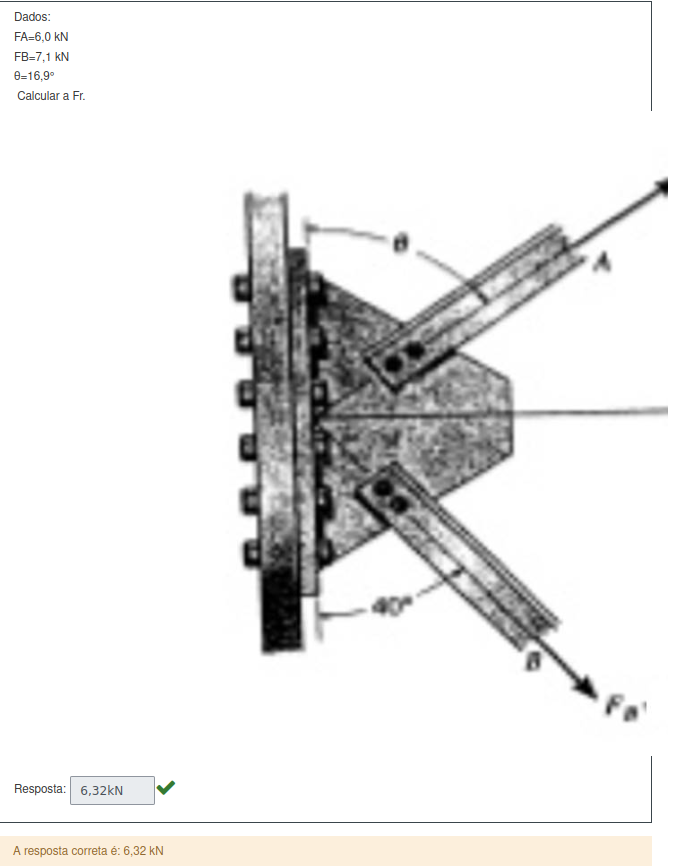

In [129]:
questao='2.3'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [130]:
%%write_and_run inputs/$questao
modFA=6
modFB=7.1
theta=16.9

In [131]:
%%write_and_run resolutions/$questao
theta=np.radians(theta)
beta=np.radians(40)
FA=modFA*vector(sy.sin(theta),sy.cos(theta),0)
FB=modFB*vector(sy.sin(beta),-sy.cos(beta),0)
F=FA+FB
modF=norm(F)
resposta(modF,'kN')

/tmp/ipykernel_10372/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
theta,0.29
beta,0.7
FA,1.74421316158951*N.i + 5.74088150434564*N.j
FB,4.56379202877443*N.i + (-5.43891554614474)*N.j
F,6.30800519036394*N.i + 0.301965958200901*N.j
modF,6.31522865156683


A resposta final é:


6.315kN

<IPython.core.display.Math object>

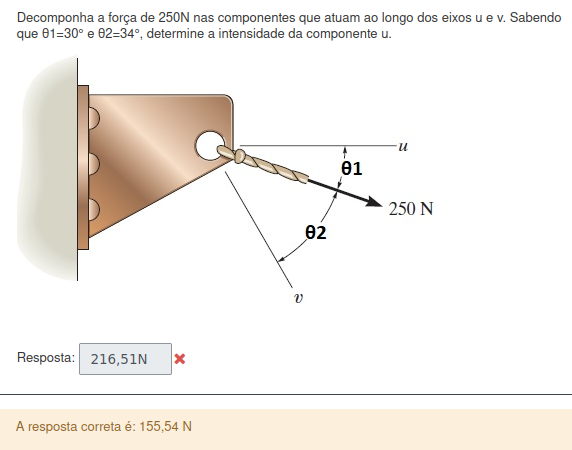

In [132]:
questao='2.4'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [133]:
%%write_and_run inputs/$questao
modF=250
theta1=30
theta2=34

In [134]:
%%write_and_run resolutions/$questao
theta3=90-theta1-theta2
theta1=np.radians(theta1)
theta2=np.radians(theta2)
theta3=np.radians(theta3)
modV=modF*sy.cos(theta2+theta3)/sy.cos(theta3)
modU=modF*sy.cos(theta1)-modV*sy.cos(theta2+theta1)
resposta(modU,'N')

/tmp/ipykernel_10372/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
theta3,0.45
theta1,0.52
theta2,0.59
modV,139.075242559399
modU,155.539777375377


A resposta final é:


155.540N

<IPython.core.display.Math object>

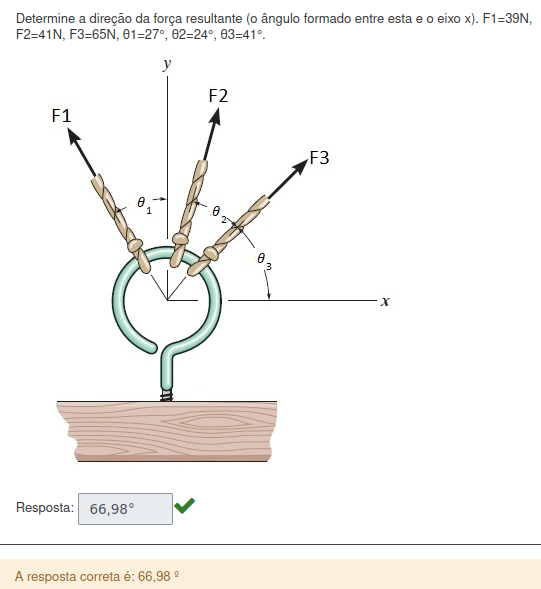

In [135]:
questao='2.5'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [136]:
%%write_and_run inputs/$questao
modF1=39
modF2=41
modF3=65
theta1=27
theta2=24
theta3=41

In [137]:
%%write_and_run resolutions/$questao
theta1rad=np.radians(theta1)
theta2rad=np.radians(theta2)
theta3rad=np.radians(theta3)
F1=modF1*vector(-sy.sin(theta1rad),sy.cos(theta1rad),0)
F2=modF2*vector(sy.cos(theta3rad+theta2rad),sy.sin(theta3rad+theta2rad),0)
F3=modF3*vector(sy.cos(theta3rad),sy.sin(theta3rad),0)
F=F1+F2+F3
alpha=sy.atan(F.dot(j)/F.dot(i))
resposta(alpha,r'^{\circ}')

/tmp/ipykernel_10372/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
theta1rad,0.47
theta2rad,0.42
theta3rad,0.72
F1,(-17.7056294898423)*N.i + 34.7492544433463*N.j
F2,17.3273487313687*N.i + 37.1586192685026*N.j
F3,49.0561227144802*N.i + 42.643836884383*N.j
F,48.6778419560065*N.i + 114.551710596232*N.j
alpha,1.16897474070849


A resposta final é:


66.977^{\circ}

<IPython.core.display.Math object>

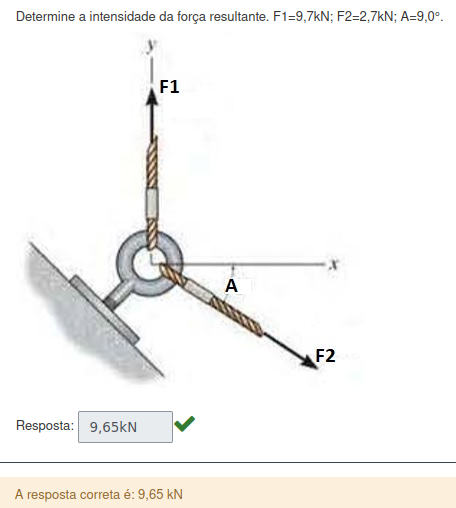

In [138]:
questao='2.6'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [139]:
%%write_and_run inputs/$questao
modF1=9.7
modF2=2.7
A=9

In [140]:
%%write_and_run resolutions/$questao
A=np.radians(A)
F1=modF1*vector(0,1,0)
F2=modF2*vector(sy.cos(A),-sy.sin(A),0)
F=F1+F2
modF=norm(F)
resposta(modF,'kN')


/tmp/ipykernel_10372/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
A,0.16
F1,9.7*N.j
F2,2.66675851960687*N.i + (-0.422373055608623)*N.j
F,2.66675851960687*N.i + 9.27762694439138*N.j
modF,9.65328766385798


A resposta final é:


9.653kN

<IPython.core.display.Math object>

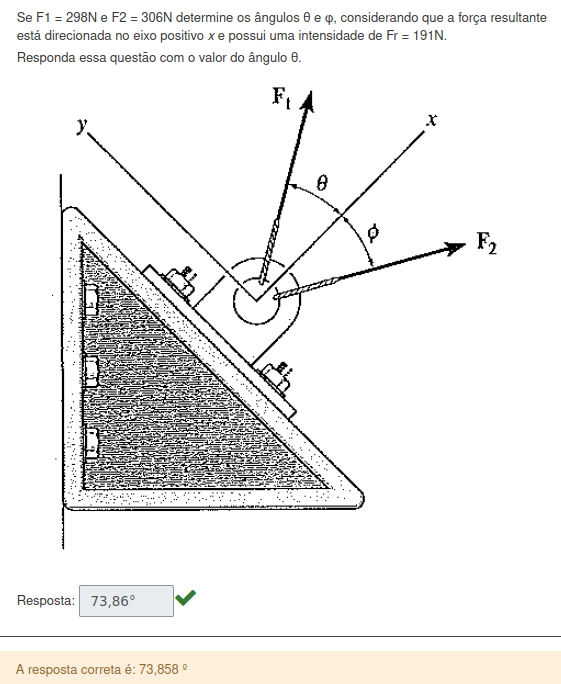

In [141]:
questao='2.7'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [142]:
%%write_and_run inputs/$questao
modF1=298
modF2=306
modF=191

In [143]:
%%write_and_run resolutions/$questao
theta=sy.acos((modF2**2-modF1**2-modF**2)/(-2*modF*modF1))
resposta(theta,r'^{\circ}')

/tmp/ipykernel_10372/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
theta,1.28906121578676


A resposta final é:


73.858^{\circ}

<IPython.core.display.Math object>

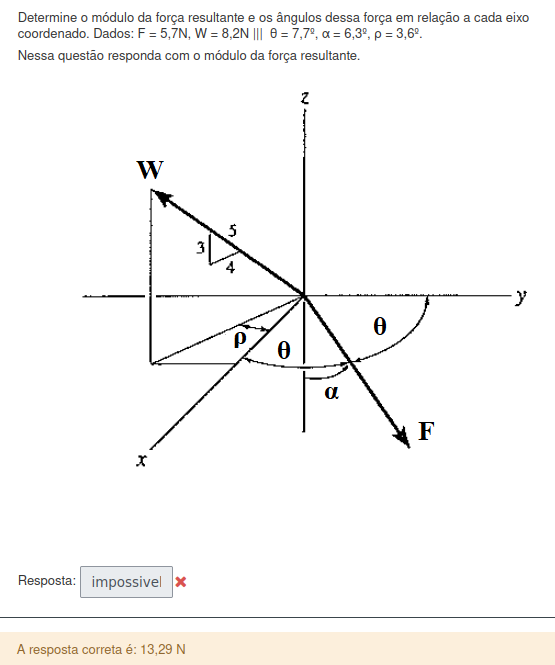

In [144]:
questao='2.8'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [145]:
%%write_and_run inputs/$questao
a=1

In [146]:
%%write_and_run resolutions/$questao
resposta(0,'impossivel')

/tmp/ipykernel_10372/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0


A resposta final é:


0.000impossivel

<IPython.core.display.Math object>

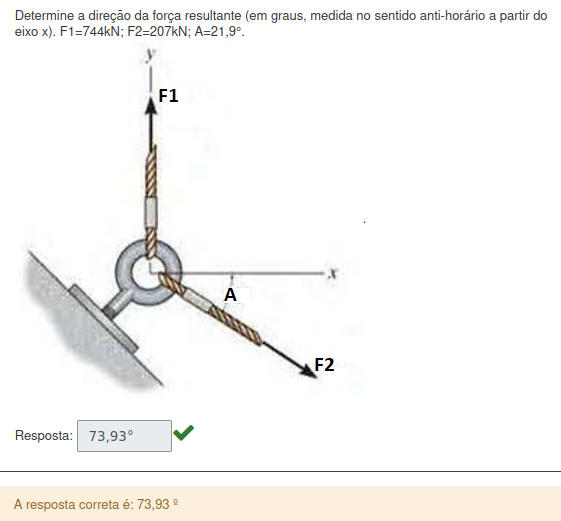

In [147]:
questao='2.9'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [148]:
%%write_and_run inputs/$questao
modF1=744
modF2=207
A=21.9


In [149]:
%%write_and_run resolutions/$questao
A=np.radians(A)
F1=modF1*vector(0,1,0)
F2=modF2*vector(sy.cos(A),-sy.sin(A),0)
F=F1+F2
theta=sy.atan(F.dot(j)/F.dot(i))
resposta(theta,r'^{\circ}')


/tmp/ipykernel_10372/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
A,0.38
F1,744*N.j
F2,192.062104557076*N.i + (-77.2084709931924)*N.j
F,192.062104557076*N.i + 666.791529006808*N.j
theta,1.29034853299007


A resposta final é:


73.932^{\circ}

<IPython.core.display.Math object>

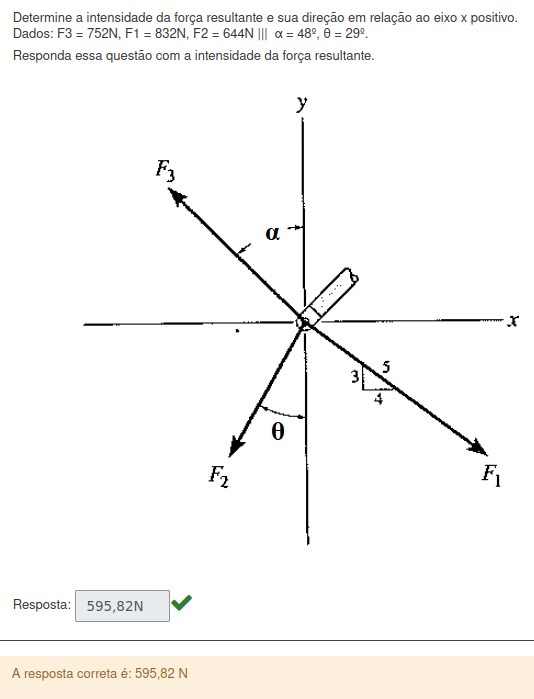

In [150]:
questao='2.10'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [151]:
%%write_and_run inputs/$questao
modF1=832
modF2=644
modF3=752
alpha=48
theta=29

In [152]:
%%write_and_run resolutions/$questao
alpha=np.radians(alpha)
theta=np.radians(theta)
F1=modF1*vector(4/5,-3/5,0)
F2=modF2*vector(-sy.sin(theta),-sy.cos(theta),0)
F3=modF3*vector(-sy.sin(alpha),sy.cos(alpha),0)
F=F1+F2+F3
modF=norm(F)
resposta(modF,'N')


/tmp/ipykernel_10372/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
alpha,0.84
theta,0.51
F1,665.6*N.i + (-499.2)*N.j
F2,(-312.217395438641)*N.i + (-563.255091397771)*N.j
F3,(-558.844908759)*N.i + 503.186215981861*N.j
F,(-205.462304197641)*N.i + (-559.26887541591)*N.j
modF,595.815771405206


A resposta final é:


595.816N

<IPython.core.display.Math object>

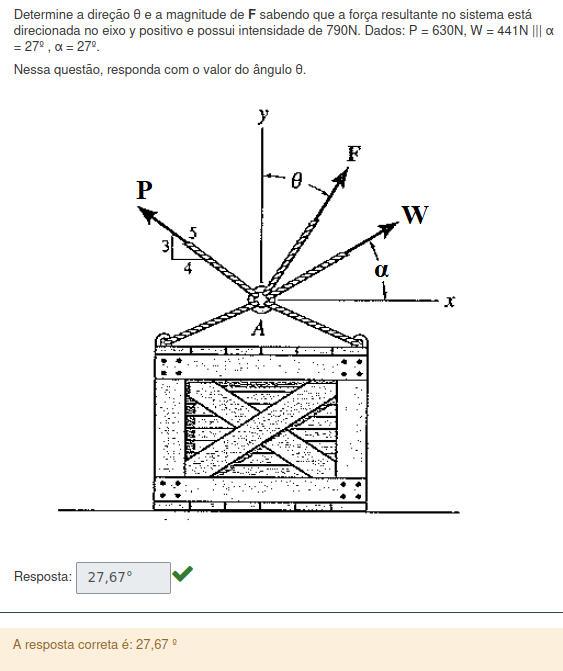

In [153]:
questao='3.1'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [154]:
%%write_and_run inputs/$questao
modP=630
modW=441
alphad=27
modFr=790

In [155]:
%%write_and_run resolutions/$questao
alpha=np.radians(alphad)
theta=sy.atan((4/5*modP-modW*sy.cos(alpha))/(modFr-modW*sy.sin(alpha)-3/5*modP))
resposta(theta,r'^{\circ}')


/tmp/ipykernel_10372/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
alpha,0.47
theta,0.482988924002792


A resposta final é:


27.673^{\circ}

<IPython.core.display.Math object>

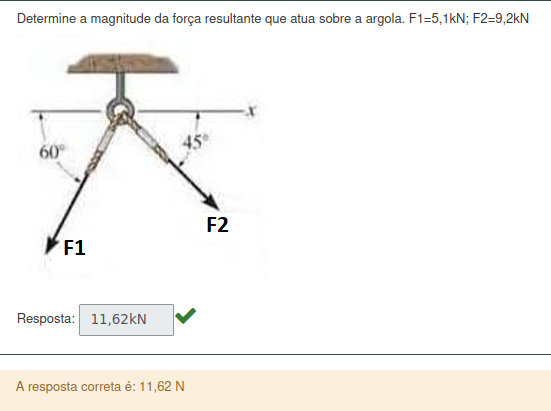

In [156]:
questao='3.2'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [157]:
%%write_and_run inputs/$questao
modF1=5.1
modF2=9.2

In [158]:
%%write_and_run resolutions/$questao
theta=np.radians(75)
F1=modF1*vector(1,0,0)
F2=modF2*vector(sy.cos(theta),sy.sin(theta),0)
F=F1+F2
modF=norm(F)
resposta(modF,'kN')


/tmp/ipykernel_10372/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
theta,1.31
F1,5.1*N.i
F2,2.38113521494319*N.i + 8.88651760185943*N.j
F,7.48113521494319*N.i + 8.88651760185943*N.j
modF,11.6162635641768


A resposta final é:


11.616kN

<IPython.core.display.Math object>

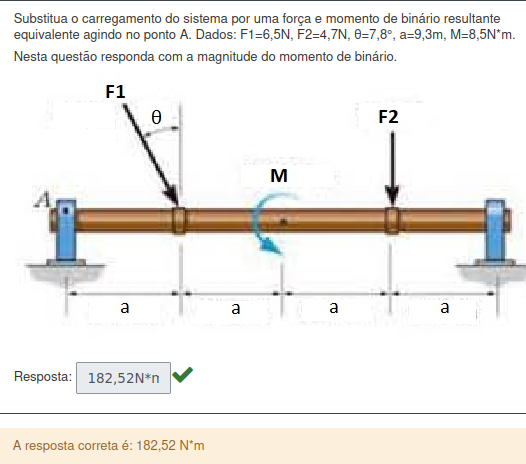

In [159]:
questao='3.3'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [160]:
%%write_and_run inputs/$questao
a=9.3
modF1=6.5
modF2=4.7
M=8.5
thetad=7.8

In [161]:
%%write_and_run resolutions/$questao
theta=np.radians(thetad)
Ma1=-modF1*sy.cos(theta)*a
Ma2=-modF2*3*a
Ma=-Ma1-Ma2-M
resposta(Ma,'N.m')


/tmp/ipykernel_10372/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
theta,0.14
Ma1,-59.8907069564988
Ma2,-131.13
Ma,182.520706956499


A resposta final é:


182.521N.m

<IPython.core.display.Math object>

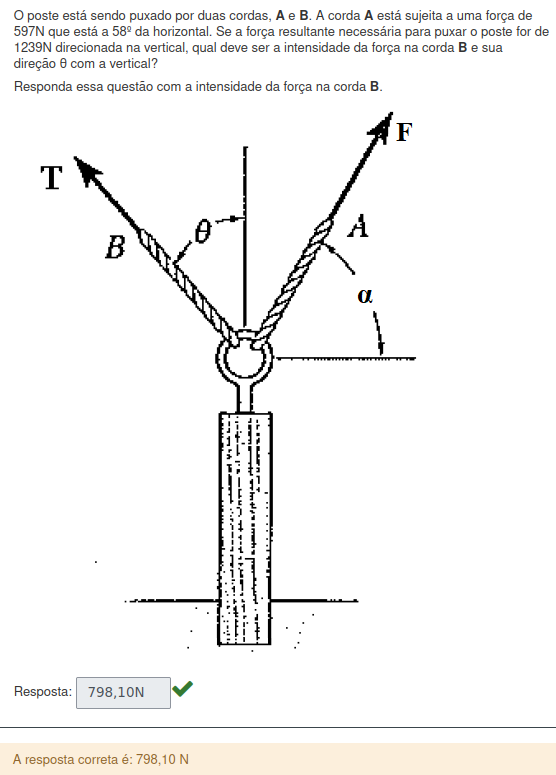

In [162]:
questao='3.4'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [163]:
%%write_and_run inputs/$questao
alphad=58
modF=597
modFr=1239

In [164]:
%%write_and_run resolutions/$questao
alpha=np.radians(alphad)
theta=sy.atan(modF*sy.cos(alpha)/(modFr-modF*sy.sin(alpha)))
T=modF*sy.cos(alpha)/sy.sin(theta)
resposta(T,'N')


/tmp/ipykernel_10372/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
alpha,1.01
theta,0.407587814025849
T,798.095533242389


A resposta final é:


798.096N

<IPython.core.display.Math object>

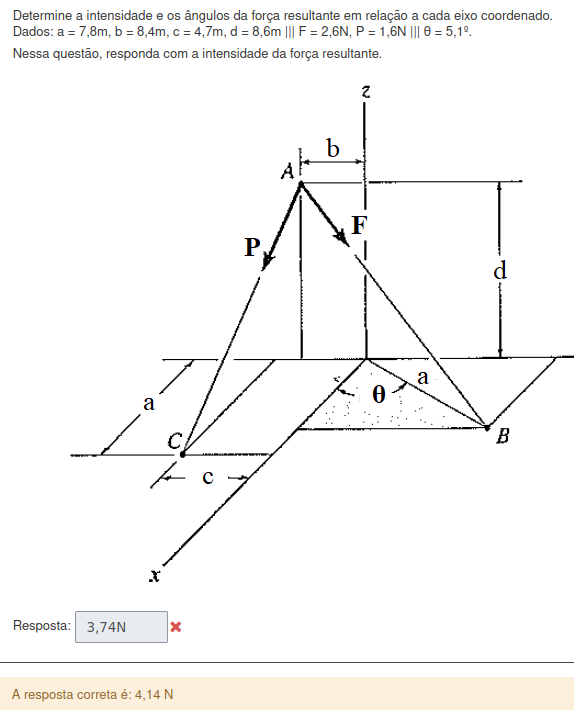

In [165]:
questao='3.5'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [166]:
%%write_and_run inputs/$questao
thetad=5.1
a=7.8
b=8.4
c=4.7
d=8.6
modF=2.6
modP=1.6

In [167]:
%%write_and_run resolutions/$questao
theta=np.radians(thetad)
xP=a
yP=b-c
zP=-d
HP=(xP**2+yP**2+zP**2)**0.5 #hipotenusa P
xF=a*sy.cos(theta)
yF=a*sy.sin(theta)+b
zF=-d
HF=(xF**2+yF**2+zF**2)**0.5 #hipotenusa F
F =modF *vector(xF/HF,yF/HF,zF/HF)
P =modP *vector(xP/HP,yP/HP,zP/HP)
Fr=F+P
modFr=norm(Fr)
resposta(modFr,'N')

/tmp/ipykernel_10372/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
theta,0.09
xP,7.8
yP,3.7
zP,-8.6
HP,12.19
xF,7.76912031020400
yF,9.09337551555824
zF,-8.6
HF,14.7312154509184
F,1.37121834066116*N.i + 1.60494403324862*N.j + ...


A resposta final é:


4.137N

<IPython.core.display.Math object>

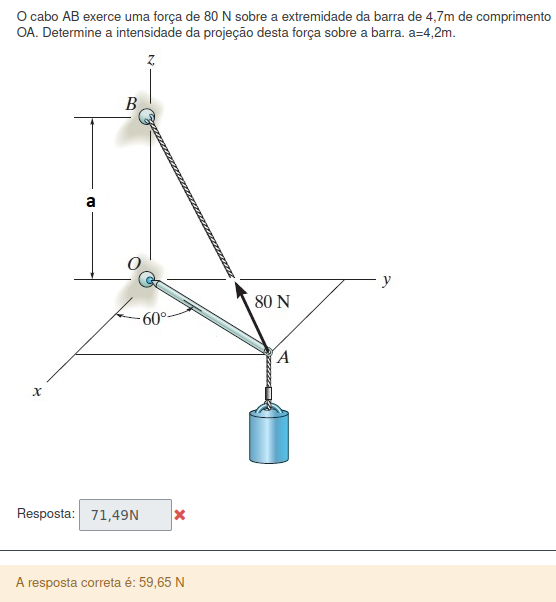

In [168]:
questao='3.6'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [169]:
%%write_and_run inputs/$questao
thetad=60
a=4.2
L=4.7
modF=80

In [170]:
%%write_and_run resolutions/$questao
dx=L*sy.cos(60)
dy=L*sy.sin(60)
dz=a
LF=(dx**2+dy**2+dz**2)**0.5
F =modF/LF *vector(-dx,-dy,dz)
Du= 1/L*vector(-dx,-dy,0)
modT=F.dot(Du)
modT=modT.evalf()
resposta(modT,'N')


/tmp/ipykernel_10372/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
dx,4.7*cos(60)
dy,4.7*sin(60)
dz,4.2
LF,4.7*(sin(60)**2 + 0.798551380715256 + cos(60)*...
F,(-80.0*cos(60)/(sin(60)**2 + 0.798551380715256...
Du,(-1.0*cos(60))*N.i + (-1.0*sin(60))*N.j
modT,59.6524880493743


A resposta final é:


59.652N

<IPython.core.display.Math object>

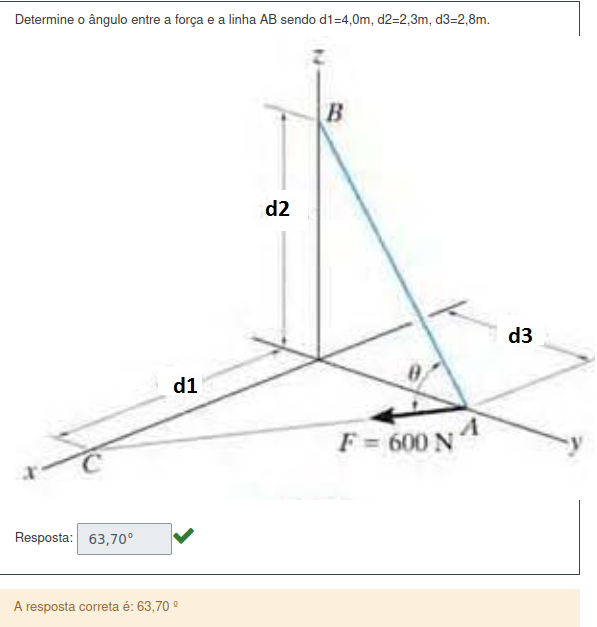

In [171]:
questao='3.7'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [172]:
%%write_and_run inputs/$questao
d1=4
d2=2.3
d3=2.8

In [173]:
%%write_and_run resolutions/$questao
a=(d1**2+d3**2)**0.5
b=(d2**2+d3**2)**0.5
c=(d1**2+d2**2)**0.5
theta=sy.acos((a**2+b**2-c**2)/(2*a*b))
resposta(theta,r'^{\circ}')


/tmp/ipykernel_10372/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
a,4.88
b,3.62
c,4.61
theta,1.11170979156551


A resposta final é:


63.696^{\circ}

<IPython.core.display.Math object>

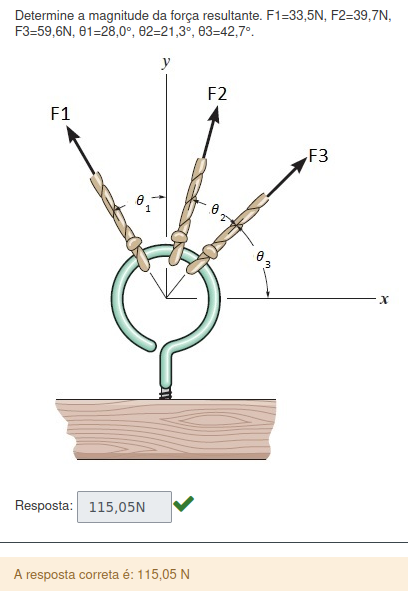

In [174]:
questao='3.8'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [175]:
%%write_and_run inputs/$questao
modF1=33.5
modF2=39.7
modF3=59.6
theta1=28
theta2=21.3
theta3=42.7

In [176]:
%%write_and_run resolutions/$questao
theta1rad=np.radians(theta1)
theta2rad=np.radians(theta2)
theta3rad=np.radians(theta3)
F1=modF1*vector(-sy.sin(theta1rad),sy.cos(theta1rad),0)
F2=modF2*vector(sy.cos(theta3rad+theta2rad),sy.sin(theta3rad+theta2rad),0)
F3=modF3*vector(sy.cos(theta3rad),sy.sin(theta3rad),0)
F=F1+F2+F3
modF=norm(F)
resposta(modF,'N')


/tmp/ipykernel_10372/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
theta1rad,0.49
theta2rad,0.37
theta3rad,0.75
F1,(-15.7272973533273)*N.i + 29.5787443607741*N.j
F2,17.4033345275264*N.i + 35.6821236380769*N.j
F3,43.8009098709376*N.i + 40.418316324137*N.j
F,45.4769470451366*N.i + 105.679184322988*N.j
modF,115.048870971071


A resposta final é:


115.049N

<IPython.core.display.Math object>

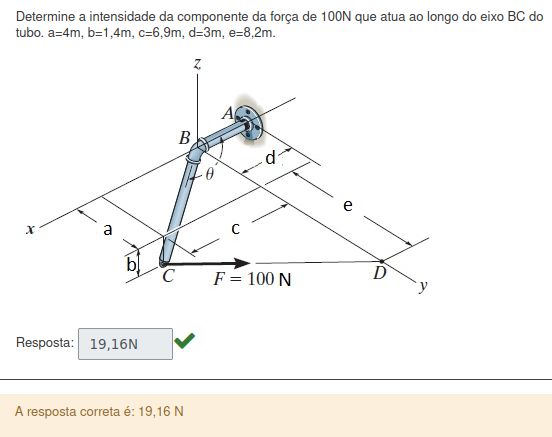

In [177]:
questao='3.9'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [178]:
%%write_and_run inputs/$questao
a=4
b=1.4
c=6.9
d=3.0
e=8.2
modF=100

In [179]:
%%write_and_run resolutions/$questao
BC=-c*i-a*j+b*k
CD=vector(-c,e,b)
CD=unit(CD)
F=modF*CD
modT=projectNorm(F,BC)
resposta(modT,'N')


/tmp/ipykernel_10372/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
BC,(-6.9)*N.i + (-4)*N.j + 1.4*N.k
CD,(-0.638423814593796)*N.i + 0.758706562270888*N...
F,(-63.8423814593796)*N.i + 75.8706562270887*N.j...
modT,19.1619833649569


A resposta final é:


19.162N

<IPython.core.display.Math object>

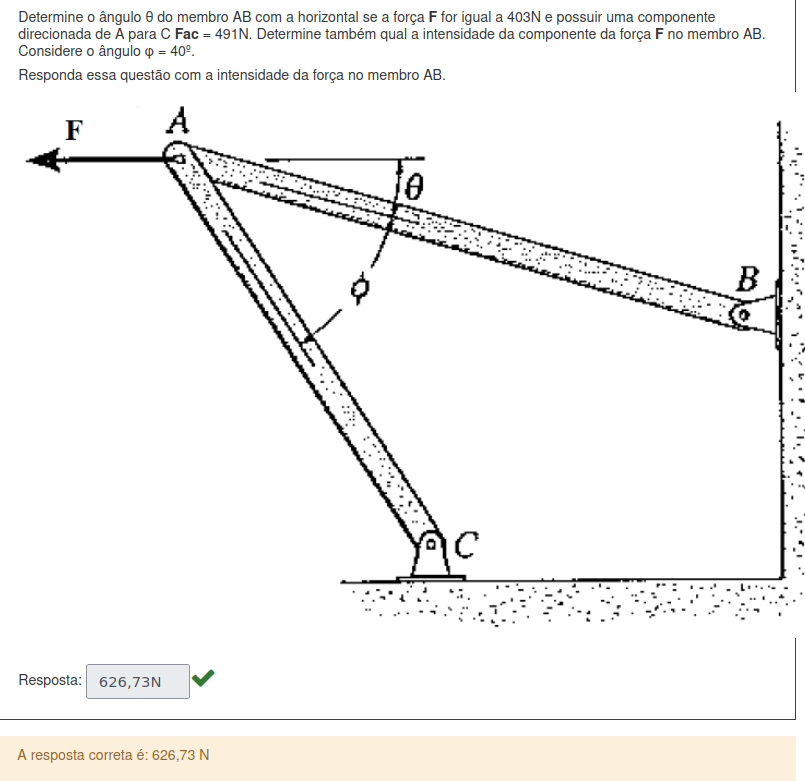

In [180]:
questao='3.10'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [181]:
%%write_and_run inputs/$questao
modF=403
modFAC=491
psi=40

In [182]:
%%write_and_run resolutions/$questao
psiRad=np.radians(psi)
FAC=modFAC*vector(sy.cos(psiRad),-sy.sin(psiRad),0)
theta=sy.asin(modFAC/modF*sy.sin(psiRad))
thetaDeg=np.rad2deg(float(theta))
#print(thetaDeg)
modFAB=(modF*(-sy.cos(theta))-modFAC*sy.cos(psiRad))/(-1)
resposta(modFAB,'N')


/tmp/ipykernel_10372/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
psiRad,0.7
FAC,376.127821571418*N.i + (-315.608716356091)*N.j
theta,0.899712524368218
thetaDeg,51.55
modFAB,626.727378953431


A resposta final é:


626.727N